In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 0 Aided by Github Copilot

# 1 Suppose we have 5 completely independent classifiers
and you have an accuracy of 70% for each. Assuming that the
errors are uncorrelated, calculate the probability that the ensemble makes a correct
prediction. (hint: Assume that each classifier prediction follows a binomial distribu-
tion).

This is just $P(X \geq 3)$ where $X$ is the number of correct predictions. We can calculate this using the binomial distribution.

So $P(X = 3) + P(X = 4) + P(X = 5)$

In [109]:
from math import comb

n = 5  # number of classifiers
p = 0.7  # accuracy of each classifier

P_X_3 = comb(n, 3) * (p**3) * ((1-p)**(n-3))
P_X_4 = comb(n, 4) * (p**4) * ((1-p)**(n-4))
P_X_5 = comb(n, 5) * (p**5) * ((1-p)**(n-5))

correct = P_X_3 + P_X_4 + P_X_5
print(correct)

0.8369199999999999


# 2 Assume now that errors are partially correlated
What alternative distributions
can be used to calculate the probability that the ensemble makes a correct prediction?

Multinomial distribution

# 3 How does Unstable procedure of trees affect accuracy in ensembles

# 4 Outcome using CART for bagging?

# 5 What is a ROC Curve?
How does the concept of goodness of fit relate to ROC curve?

ROC curve is a graphical representation of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test. It is used to determine the optimal threshold for a binary classifier.

Goodness of fit is a measure of how well a model fits the data. In the context of ROC curve, the area under the curve (AUC) is a measure of the model's ability to distinguish between the two classes. A model with an AUC of 0.5 is no better than random guessing, while a model with an AUC of 1 is perfect.

# 6 What is a learning curve

A learning curve is a plot of the model's performance on the training set and the validation set as a function of the training set size. It is used to evaluate the model's performance as the amount of training data increases. A model with a high bias will have a high training error and a high validation error, while a model with a high variance will have a low training error and a high validation error.

# 7 Use the bagging approach in order to analyze the scenarios 1 and 2
What test error rate do you obtain? Determine which variables are most
important

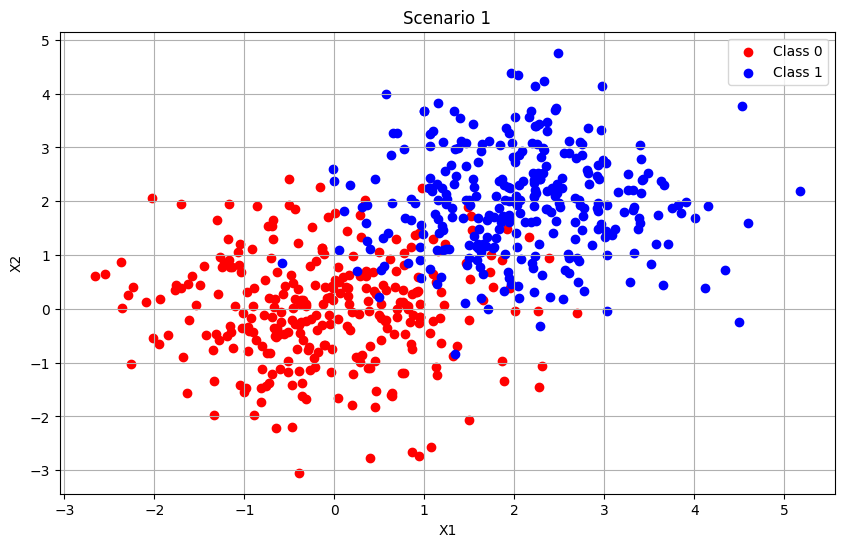

In [110]:
# scenario one
# Scenario 1
np.random.seed(0)
n = 300
mean = [0, 0]
cov = [[1, 0], [0, 1]]
X1 = np.random.multivariate_normal(mean, cov, n)
y1 = np.zeros(n)

mean = [2, 2]
cov = [[1, 0], [0, 1]]
X2 = np.random.multivariate_normal(mean, cov, n)
y2 = np.ones(n)

X_s1 = np.concatenate((X1, X2))
y_s1 = np.concatenate((y1, y2))

plt.figure(figsize=(10, 6))
plt.scatter(X1[:, 0], X1[:, 1], color="r", label="Class 0")
plt.scatter(X2[:, 0], X2[:, 1], color="b", label="Class 1")
plt.title("Scenario 1")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

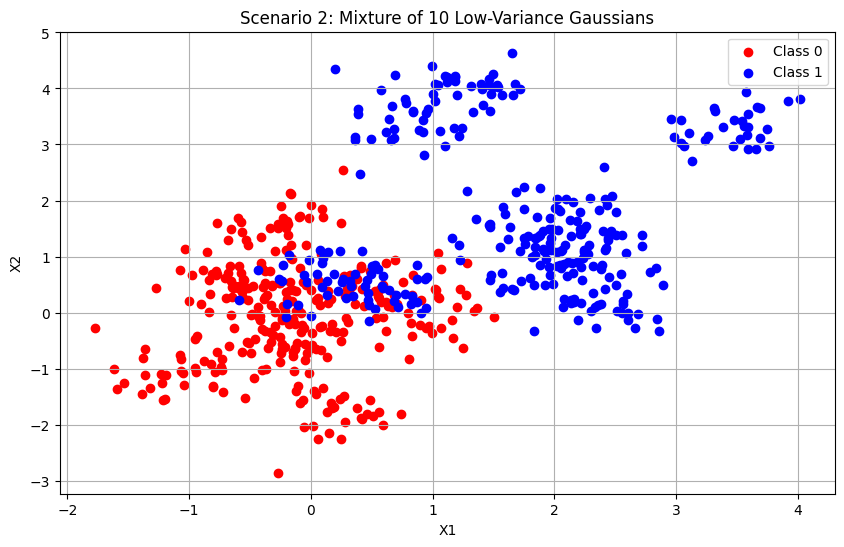

In [111]:
# Scenario 2: Mixture of 10 low-variance Gaussians
np.random.seed(15)
n = 300 
n_gaussians = 10 
low_variance = [[0.1, 0], [0, 0.1]]  # low variance

# distribution of means
meta_mean_class_1 = [0, 0]
meta_cov_class_1 = [[1, 0], [0, 1]]
meta_mean_class_2 = [2, 2]
meta_cov_class_2 = [[1, 0], [0, 1]]

# Generate means for the Gaussian components
means_class_1 = np.random.multivariate_normal(meta_mean_class_1, meta_cov_class_1, n_gaussians)
means_class_2 = np.random.multivariate_normal(meta_mean_class_2, meta_cov_class_2, n_gaussians)

# Generate data for each mixture component
X1 = np.vstack([np.random.multivariate_normal(mean, low_variance, n // n_gaussians) for mean in means_class_1])
X2 = np.vstack([np.random.multivariate_normal(mean, low_variance, n // n_gaussians) for mean in means_class_2])

y1 = np.zeros(X1.shape[0])
y2 = np.ones(X2.shape[0])

X_s2 = np.concatenate((X1, X2))
y_s2 = np.concatenate((y1, y2))

# Plotting the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X1[:, 0], X1[:, 1], color="red", label="Class 0")
plt.scatter(X2[:, 0], X2[:, 1], color="blue", label="Class 1")
plt.title("Scenario 2: Mixture of 10 Low-Variance Gaussians")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

In [112]:
from sklearn.ensemble import BaggingClassifier

# train test split
from sklearn.model_selection import train_test_split

X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(X_s1, y_s1, test_size=0.3, random_state=0)
X_train_s2, X_test_s2, y_train_s2, y_test_s2 = train_test_split(X_s2, y_s2, test_size=0.3, random_state=0)

# SCenario 1
bagging = BaggingClassifier(random_state=0)
bagging.fit(X_train_s1, y_train_s1)

print(f"Scenario 1: Bagging Test Error Rate: {1 - bagging.score(X_test_s1, y_test_s1)}")

# Scenario 2
bagging_2 = BaggingClassifier(random_state=0)
bagging_2.fit(X_train_s2, y_train_s2)

print(f"Scenario 2: Bagging Test Error Rate: {1 - bagging_2.score(X_test_s2, y_test_s2)}")


Scenario 1: Bagging Test Error Rate: 0.10555555555555551
Scenario 2: Bagging Test Error Rate: 0.09444444444444444


# 8 Compare the ROC curve and learning curves of the bagging approach vs a tree

In [113]:
from sklearn.tree import DecisionTreeClassifier

# Scenario 1
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_s1, y_train_s1)

# Scenario 2
tree_2 = DecisionTreeClassifier(random_state=0)
tree_2.fit(X_train_s2, y_train_s2)

from sklearn.metrics import roc_curve, roc_auc_score

# Scenario 1
y_pred_proba_s1 = bagging.predict_proba(X_test_s1)[:, 1]
fpr_s1, tpr_s1, _ = roc_curve(y_test_s1, y_pred_proba_s1)
roc_auc_s1 = roc_auc_score(y_test_s1, y_pred_proba_s1)

# Scenario 2
y_pred_proba_s2 = bagging_2.predict_proba(X_test_s2)[:, 1]
fpr_s2, tpr_s2, _ = roc_curve(y_test_s2, y_pred_proba_s2)
roc_auc_s2 = roc_auc_score(y_test_s2, y_pred_proba_s2)

# same for tree
y_pred_proba_s1_tree = tree.predict_proba(X_test_s1)[:, 1]
fpr_s1_tree, tpr_s1_tree, _ = roc_curve(y_test_s1, y_pred_proba_s1_tree)
roc_auc_s1_tree = roc_auc_score(y_test_s1, y_pred_proba_s1_tree)

# Scenario 2 tree
y_pred_proba_s2_tree = tree_2.predict_proba(X_test_s2)[:, 1]
fpr_s2_tree, tpr_s2_tree, _ = roc_curve(y_test_s2, y_pred_proba_s2_tree)
roc_auc_s2_tree = roc_auc_score(y_test_s2, y_pred_proba_s2_tree)

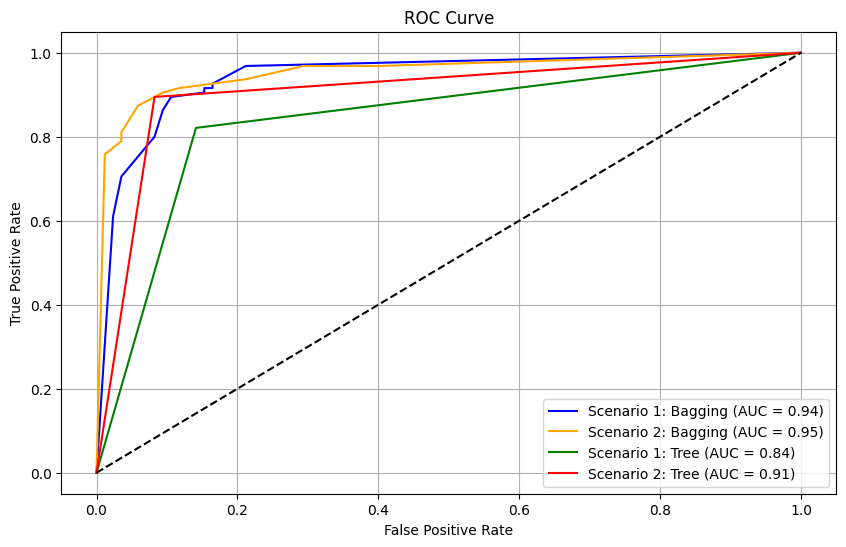

In [114]:
# Plotting the ROC curve for bagging and tree
plt.figure(figsize=(10, 6))
plt.plot(fpr_s1, tpr_s1, color="blue", label=f"Scenario 1: Bagging (AUC = {roc_auc_s1:.2f})")
plt.plot(fpr_s2, tpr_s2, color="orange", label=f"Scenario 2: Bagging (AUC = {roc_auc_s2:.2f})")
plt.plot(fpr_s1_tree, tpr_s1_tree, color="green", label=f"Scenario 1: Tree (AUC = {roc_auc_s1_tree:.2f})")
plt.plot(fpr_s2_tree, tpr_s2_tree, color="red", label=f"Scenario 2: Tree (AUC = {roc_auc_s2_tree:.2f})")
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

In [115]:
from sklearn.model_selection import learning_curve

# Scenario 1
train_sizes, train_scores, test_scores = learning_curve(bagging, X_s1, y_s1, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Scenario 2
train_sizes_2, train_scores_2, test_scores_2 = learning_curve(bagging_2, X_s2, y_s2, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# same for tree
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(tree, X_s1, y_s1, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Scenario 2 tree
train_sizes_2_tree, train_scores_2_tree, test_scores_2_tree = learning_curve(tree_2, X_s2, y_s2, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

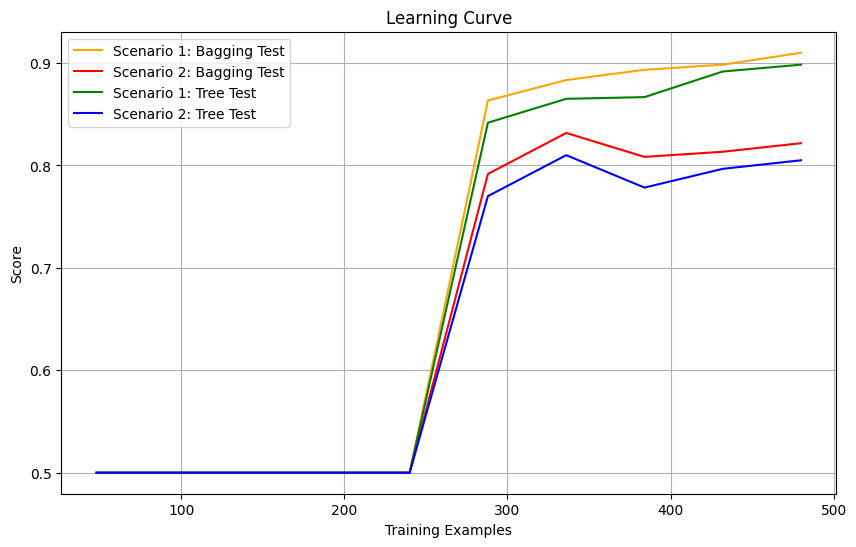

In [116]:

# Plotting the learning curve for bagging and tree
plt.figure(figsize=(10, 6))

plt.plot(train_sizes, np.mean(test_scores, axis=1), color="orange", label="Scenario 1: Bagging Test")
plt.plot(train_sizes_2, np.mean(test_scores_2, axis=1), color="red", label="Scenario 2: Bagging Test")

plt.plot(train_sizes_tree, np.mean(test_scores_tree, axis=1), color="green", label="Scenario 1: Tree Test")
plt.plot(train_sizes_2_tree, np.mean(test_scores_2_tree, axis=1), color="blue", label="Scenario 2: Tree Test")
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


# 9 What are the hyperparameters of bagging?
Main hyperparams are: n_estimators, max_samples, max_features (random forest esque)
Main hyperparam to tune is n_estimators...

Now: Use cross-validation in
order to determine the optimal level of tree complexity for scenarios 1 and 2 from
ESLII. Compare the confusion matrix and training error rates between the your first
approach and the optimal level you found for both training and test dataset.

In [117]:
# train bagging classifiers with cross validation for n_estimators in range 10 to 500 in steps of 10
from sklearn.model_selection import cross_val_score

n_estimators = np.arange(1, 151, 10)
cv_scores_s1 = []
cv_scores_s2 = []

for n in n_estimators:
    bagging = BaggingClassifier(n_estimators=n, random_state=0)
    bagging2 = BaggingClassifier(n_estimators=n, random_state=1)
    
    scores_s1 = cross_val_score(bagging, X_s1, y_s1, cv=5)
    cv_scores_s1.append((n, scores_s1.mean(), scores_s1.std()))
    
    scores_s2 = cross_val_score(bagging2, X_s2, y_s2, cv=5)
    cv_scores_s2.append((n, scores_s2.mean(), scores_s2.std()))
    
# plot the cross validation scores
cv_scores_s1 = np.array(cv_scores_s1)
cv_scores_s2 = np.array(cv_scores_s2)

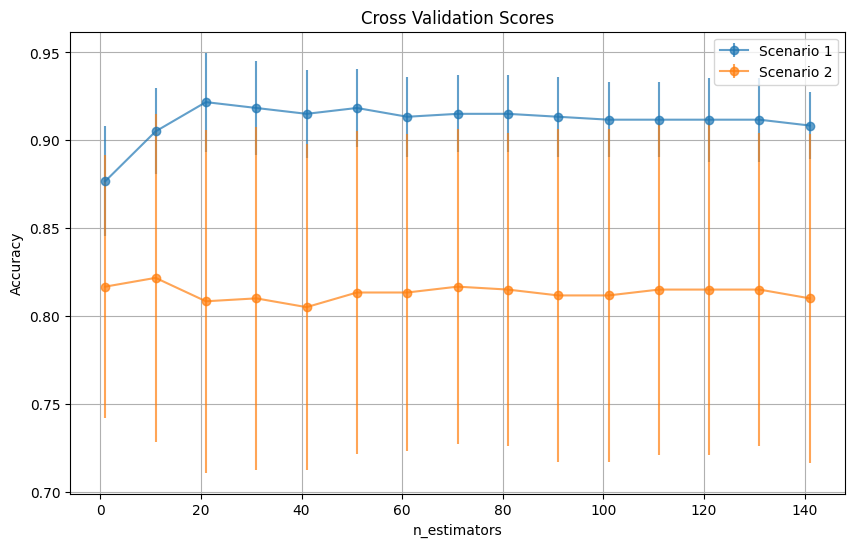

In [118]:

plt.figure(figsize=(10, 6))
plt.errorbar(cv_scores_s1[:, 0], cv_scores_s1[:, 1], yerr=cv_scores_s1[:, 2], label="Scenario 1", fmt="o-", alpha=0.7)
plt.errorbar(cv_scores_s2[:, 0], cv_scores_s2[:, 1], yerr=cv_scores_s2[:, 2], label="Scenario 2", fmt="o-", alpha=0.7)
plt.title("Cross Validation Scores")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [120]:
# for scenario 1, n_estimators = 21. For scenario 2, n_estimators = 11
# compare confusion matrix and training error rates
from sklearn.metrics import confusion_matrix

# Scenario 1
bagging_s1 = BaggingClassifier(n_estimators=21, random_state=0)
bagging_s1.fit(X_train_s1, y_train_s1)
bagging_s1_unbounded = BaggingClassifier(random_state=0)
bagging_s1_unbounded.fit(X_train_s1, y_train_s1)

# Scenario 2
bagging_s2 = BaggingClassifier(n_estimators=11, random_state=0)
bagging_s2.fit(X_train_s2, y_train_s2)
bagging_s2_unbounded = BaggingClassifier(random_state=0)
bagging_s2_unbounded.fit(X_train_s2, y_train_s2)

# Scenario 1
y_pred_s1 = bagging_s1.predict(X_test_s1)
y_pred_s1_unbounded = bagging_s1_unbounded.predict(X_test_s1)

# Scenario 2
y_pred_s2 = bagging_s2.predict(X_test_s2)
y_pred_s2_unbounded = bagging_s2_unbounded.predict(X_test_s2)

# confusion matrix
cm_s1 = confusion_matrix(y_test_s1, y_pred_s1)
cm_s1_unbounded = confusion_matrix(y_test_s1, y_pred_s1_unbounded)

cm_s2 = confusion_matrix(y_test_s2, y_pred_s2)
cm_s2_unbounded = confusion_matrix(y_test_s2, y_pred_s2_unbounded)

print("Scenario 1: Confusion Matrix")
print(cm_s1)
print(cm_s1_unbounded)
print("Scenario 2: Confusion Matrix")
print(cm_s2)
print(cm_s2_unbounded)

# training error rates
train_error_s1 = 1 - bagging_s1.score(X_train_s1, y_train_s1)
train_error_s1_unbounded = 1 - bagging_s1_unbounded.score(X_train_s1, y_train_s1)

train_error_s2 = 1 - bagging_s2.score(X_train_s2, y_train_s2)
train_error_s2_unbounded = 1 - bagging_s2_unbounded.score(X_train_s2, y_train_s2)

print(f"Scenario 1: Training Error Rate: {train_error_s1}")
print(f"Scenario 1: Training Error Rate (Unbounded): {train_error_s1_unbounded}")
print(f"Scenario 2: Training Error Rate: {train_error_s2}")
print(f"Scenario 2: Training Error Rate (Unbounded): {train_error_s2_unbounded}")



Scenario 1: Confusion Matrix
[[74 11]
 [ 9 86]]
[[76  9]
 [10 85]]
Scenario 2: Confusion Matrix
[[78  7]
 [ 9 86]]
[[80  5]
 [12 83]]
Scenario 1: Training Error Rate: 0.00952380952380949
Scenario 1: Training Error Rate (Unbounded): 0.00952380952380949
Scenario 2: Training Error Rate: 0.01666666666666672
Scenario 2: Training Error Rate (Unbounded): 0.023809523809523836


# 11 Random forests and other ensembles are difficult to interpret.
SHAP (SHapley Additive exPlanations) can help in interpreting the results of this
methods. Provide a brief explanation of the SHAP methodology. Do a very brief
research into other methods that also try to explain the output of machine learning
algorithms

explain individual predictions by assessing the contribution of each feature 

others (LIME, simple local models; feature importance, common for random forests; partial dependence plots, show the relationship between the target and a feature; counterfactual explanations, show how the input could be changed to change the output)

# 12 Do you need to use cross-validation to obtain an unbiased estimate of the test error for random forests

No, because they already use oob error to estimate test error

# 15 Perform an analysis for the Spam dataset using Random Forest

features: 


crl.tot		Total length of uninterrupted sequences of capitals


dollar		Occurrences of the dollar sign, as percent of total number of characters


bang		Occurrences of ‘!’, as percent of total number of characters


money		Occurrences of ‘money’, as percent of total number of characters


n000		Occurrences of the string ‘000’, as percent of total number of words


make		Occurrences of ‘make’, as a percent of total number of words


yesno		Outcome variable, a factor with levels 'n' not spam, 'y' spam

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# load the spam dataset
df = pd.read_csv("spam.csv")
X = df.drop("yesno", axis=1)
y = df["yesno"]

# convert the outcome variable to binary
y = y.map({"n": 0, "y": 1})

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [70]:
# train random forest classifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

# predict on the test set
y_pred = rf.predict(X_test)


In [71]:
# metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8711078928312816


In [72]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# make it a dataframe
cm = pd.DataFrame(cm, index=["n", "y"], columns=["n", "y"])
print("Confusion Matrix")
print(cm)

Confusion Matrix
     n    y
n  757   65
y  113  446


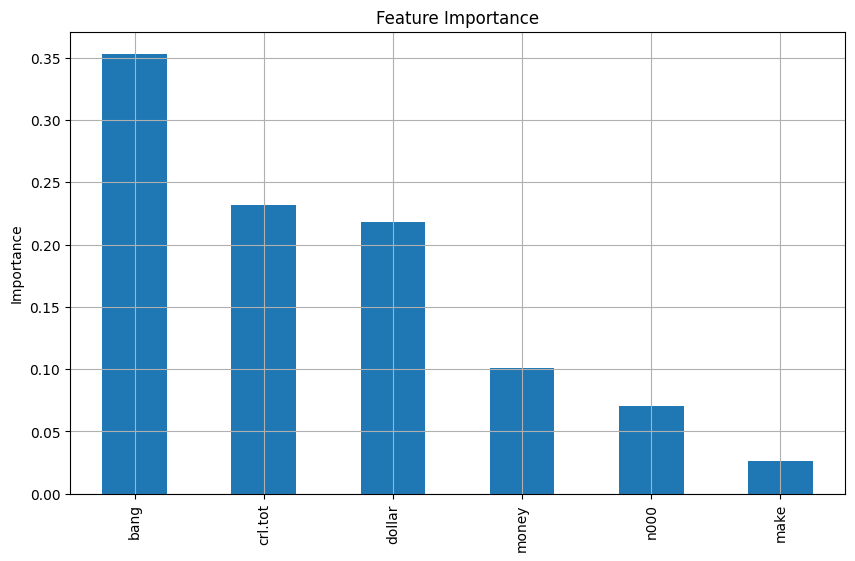

In [73]:
# feature importance
feature_importance = rf.feature_importances_
feature_importance = pd.Series(feature_importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind="bar")
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.grid(True)
plt.show()

In [74]:
# shapley values
import shap

explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for the test set
#shap_values = explainer(X_train)

In [109]:
shap_values = explainer.shap_values(X_test)

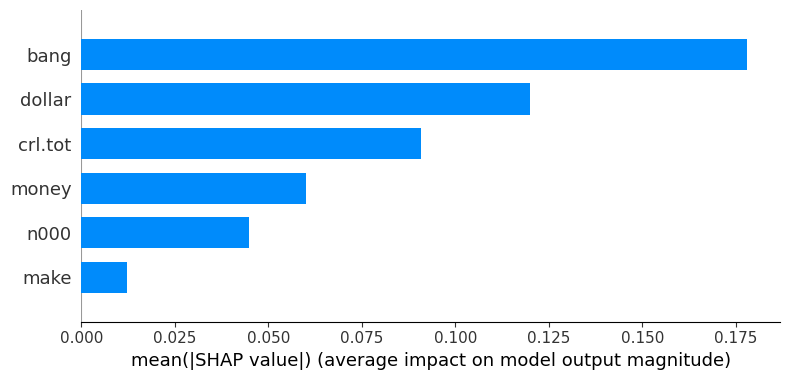

In [123]:
selected_shap_values = shap_values[:, :, 1] # for class 1
shap.summary_plot(selected_shap_values, features=X_test, plot_type='bar')

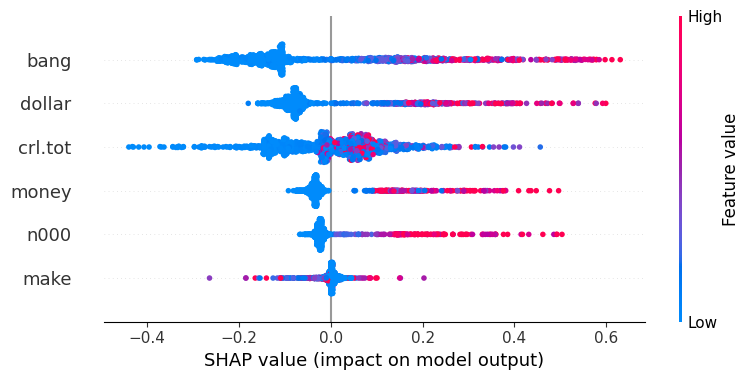

In [124]:
shap.summary_plot(selected_shap_values, features=X_test, plot_type='dot')

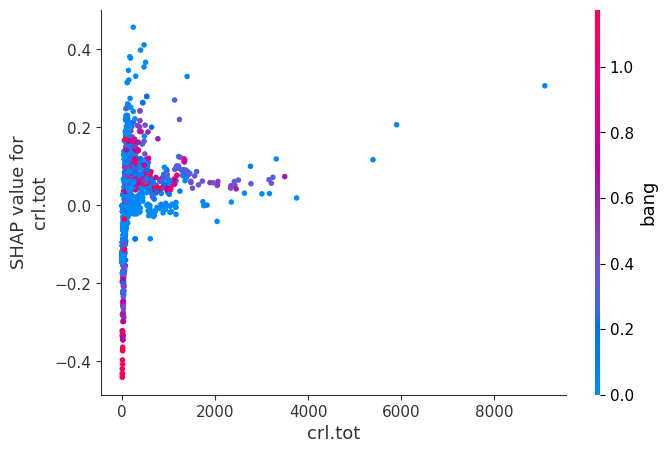

In [127]:
shap.dependence_plot("crl.tot", selected_shap_values, X_test) # high vertical dispersion = interaction effect with bang